# Blood Cells CNN 

## Important liberaries

In [3]:
# Import liberaries
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


## Loading Data

In [4]:
!pip install opendatasets
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maramabdelnasser
Your Kaggle Key: ··········


100%|██████████| 268M/268M [00:13<00:00, 20.4MB/s]


In [5]:
data_path='/content/blood-cells-image-dataset/bloodcells_dataset'

## Data Spliting

In [6]:
# Creating the Train dataset and Validation dataset
train_ds= tf.keras.utils.image_dataset_from_directory(
  directory=data_path,
  validation_split=0.3,
  batch_size=11965,
  seed=222,
  subset="training",
  image_size=(100, 100),                                     
  ) 

Found 17092 files belonging to 8 classes.
Using 11965 files for training.


In [7]:
# Creating the Train dataset and Validation dataset
val_ds= tf.keras.utils.image_dataset_from_directory(
  directory=data_path,
  validation_split=0.3,
  batch_size=5127,
  seed=222,
  subset="validation",
  image_size=(100, 100),                                     
  ) 

Found 17092 files belonging to 8 classes.
Using 5127 files for validation.


In [8]:
# Get Class names 
class_names=train_ds.class_names
print(class_names)

['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']


## Data Visualization

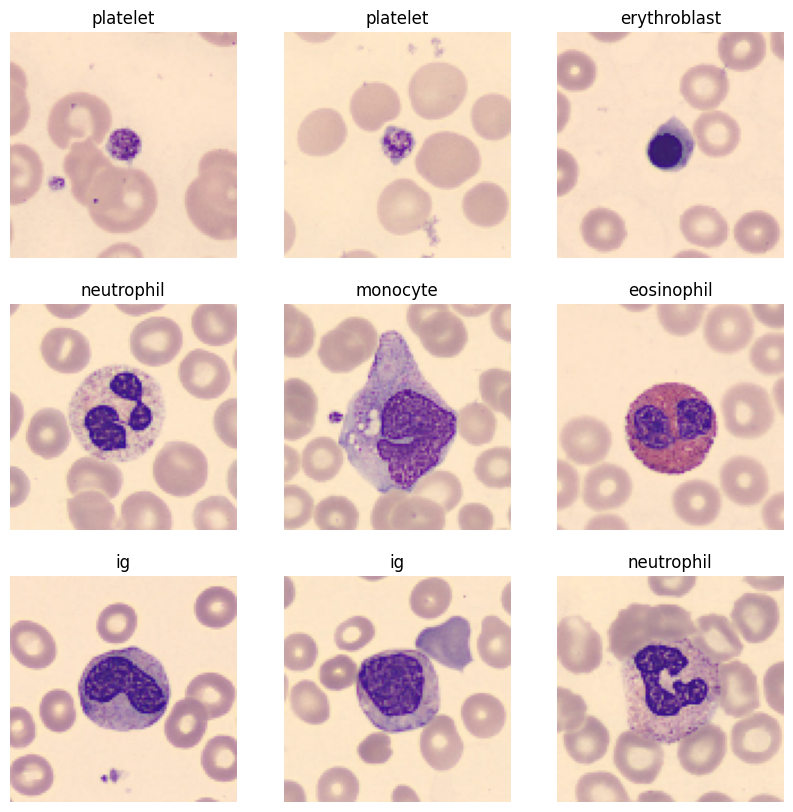

In [7]:
# Showing some figures from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Data Preprocessing

In [9]:
# Tap into the shape of a single batch of training data
for img_train, label_train in train_ds:
    print(img_train.shape)
    print(label_train.shape)
    break

(11965, 100, 100, 3)
(11965,)


In [10]:
# Tap into the shape of a single batch of validation data
for img_test, label_test in val_ds:
    print(img_test.shape)
    print(label_test.shape)
    break

(5127, 100, 100, 3)
(5127,)


In [11]:
# Pixel value of the image falls between 0 to 255.
# Normalize the data. Before we need to connvert data type to float for computation.
img_train = img_train.numpy().astype('float32')
img_test = img_test.numpy().astype('float32')
img_train /= 255
img_test /= 255
# So, we are scale the value between 0 to 1 before by deviding each value by 255
print(img_train.shape)
print(img_test.shape)


(11965, 100, 100, 3)
(5127, 100, 100, 3)


In [12]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
print (" Shape before one-hot encoding : ", label_train.shape)
label_train = keras.utils.to_categorical(label_train, len(class_names))

label_test = keras.utils.to_categorical(label_test, len(class_names))
print (" Shape after one-hot encoding : ", label_test.shape)

 Shape before one-hot encoding :  (11965,)
 Shape after one-hot encoding :  (5127, 8)


## CNN Model Building
-In the first stage, Our net will learn 32 convolutional filters, each of which with a 3 x 3 size. The output dimension is the same one of the input shape, so it will be 32 x 32 and activation is relu, which is a simple way of introducing non-linearity; folowed by another 32 convolutional filters, each of which with a 3 x 3 size and activation is also relu. After that we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.

-In the next stage in the deep pipeline, Our net will learn 64 convolutional filters, each of which with a 3 x 3 size. The output dimension is the same one of the input shape and activation is relu; folowed by another 64 convolutional filters, each of which with a 3 x 3 size and activation is also relu. After that we have a max-pooling operation with pool size 2 x 2 and a dropout at 25%.

-And the Final stage in the deep pipeline is a dense network with 512 units and relu activation followed by a dropout at 50% and by a softmax layer with 10 classes as output, one for each category.

In [13]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(100,100,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                        

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Fitting The Model on train and validation dataset
#model.fit(img_train,label_train, validation_data=(img_test,label_test),epochs=73)

Epoch 1/73
374/374 [==============================] - 30s 42ms/step - loss: 1.3635 - accuracy: 0.4762 - val_loss: 0.8543 - val_accuracy: 0.6573
Epoch 2/73
374/374 [==============================] - 13s 35ms/step - loss: 0.8069 - accuracy: 0.6976 - val_loss: 0.5411 - val_accuracy: 0.8036
Epoch 3/73
374/374 [==============================] - 14s 36ms/step - loss: 0.5186 - accuracy: 0.8155 - val_loss: 0.5164 - val_accuracy: 0.8184
Epoch 4/73
374/374 [==============================] - 15s 41ms/step - loss: 0.4016 - accuracy: 0.8588 - val_loss: 0.3126 - val_accuracy: 0.8910
Epoch 5/73
374/374 [==============================] - 14s 37ms/step - loss: 0.3949 - accuracy: 0.8667 - val_loss: 0.3116 - val_accuracy: 0.8912
Epoch 6/73
374/374 [==============================] - 14s 37ms/step - loss: 0.2984 - accuracy: 0.9004 - val_loss: 0.2699 - val_accuracy: 0.9070
Epoch 7/73
374/374 [==============================] - 13s 35ms/step - loss: 0.2335 - accuracy: 0.9214 - val_loss: 0.2660 - val_accuracy:

In [16]:
model.fit(img_train,label_train, validation_data=(img_test,label_test),epochs=15)

Epoch 1/15
374/374 [==============================] - 30s 44ms/step - loss: 1.4304 - accuracy: 0.4410 - val_loss: 0.8436 - val_accuracy: 0.6743
Epoch 2/15
374/374 [==============================] - 13s 34ms/step - loss: 0.7337 - accuracy: 0.7320 - val_loss: 0.5452 - val_accuracy: 0.8048
Epoch 3/15
374/374 [==============================] - 13s 35ms/step - loss: 0.5381 - accuracy: 0.8062 - val_loss: 0.4224 - val_accuracy: 0.8543
Epoch 4/15
374/374 [==============================] - 14s 36ms/step - loss: 0.4061 - accuracy: 0.8575 - val_loss: 0.3548 - val_accuracy: 0.8670
Epoch 5/15
374/374 [==============================] - 13s 36ms/step - loss: 0.3419 - accuracy: 0.8820 - val_loss: 0.3271 - val_accuracy: 0.8810
Epoch 6/15
374/374 [==============================] - 17s 45ms/step - loss: 0.3578 - accuracy: 0.8796 - val_loss: 0.2929 - val_accuracy: 0.8941
Epoch 7/15
374/374 [==============================] - 15s 39ms/step - loss: 0.2383 - accuracy: 0.9205 - val_loss: 0.2558 - val_accuracy:

In [17]:
model.save('/content/blood-cells-image-dataset')

## Model Loss and Accuracy

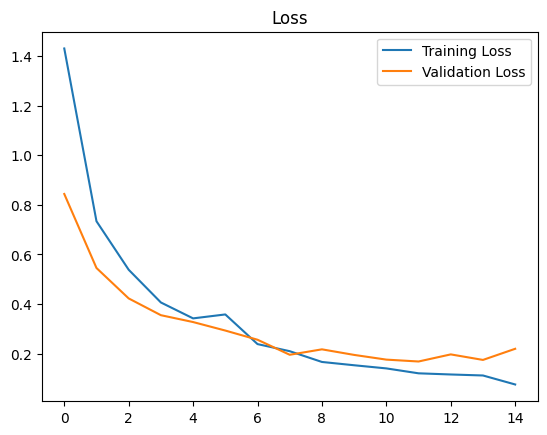

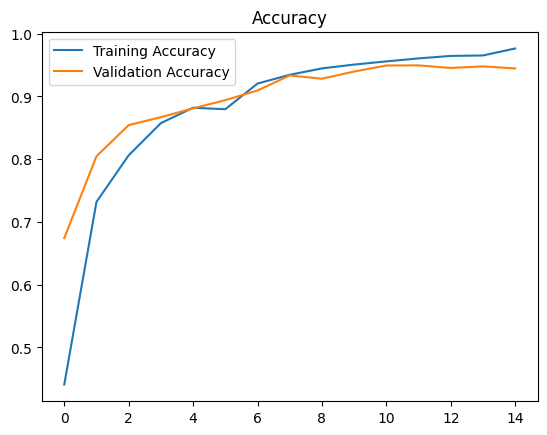

In [18]:
# Plot Model Loss and Model accuracy
history = model.history.history

train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']

# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

# Accuracy
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

## Evaluating

In [54]:
# Grab a batch of data
for images, labels in val_ds.take(1):
    eval_images = images.numpy()
    eval_labels = labels.numpy()

161/161 [==============================] - 1s 6ms/step


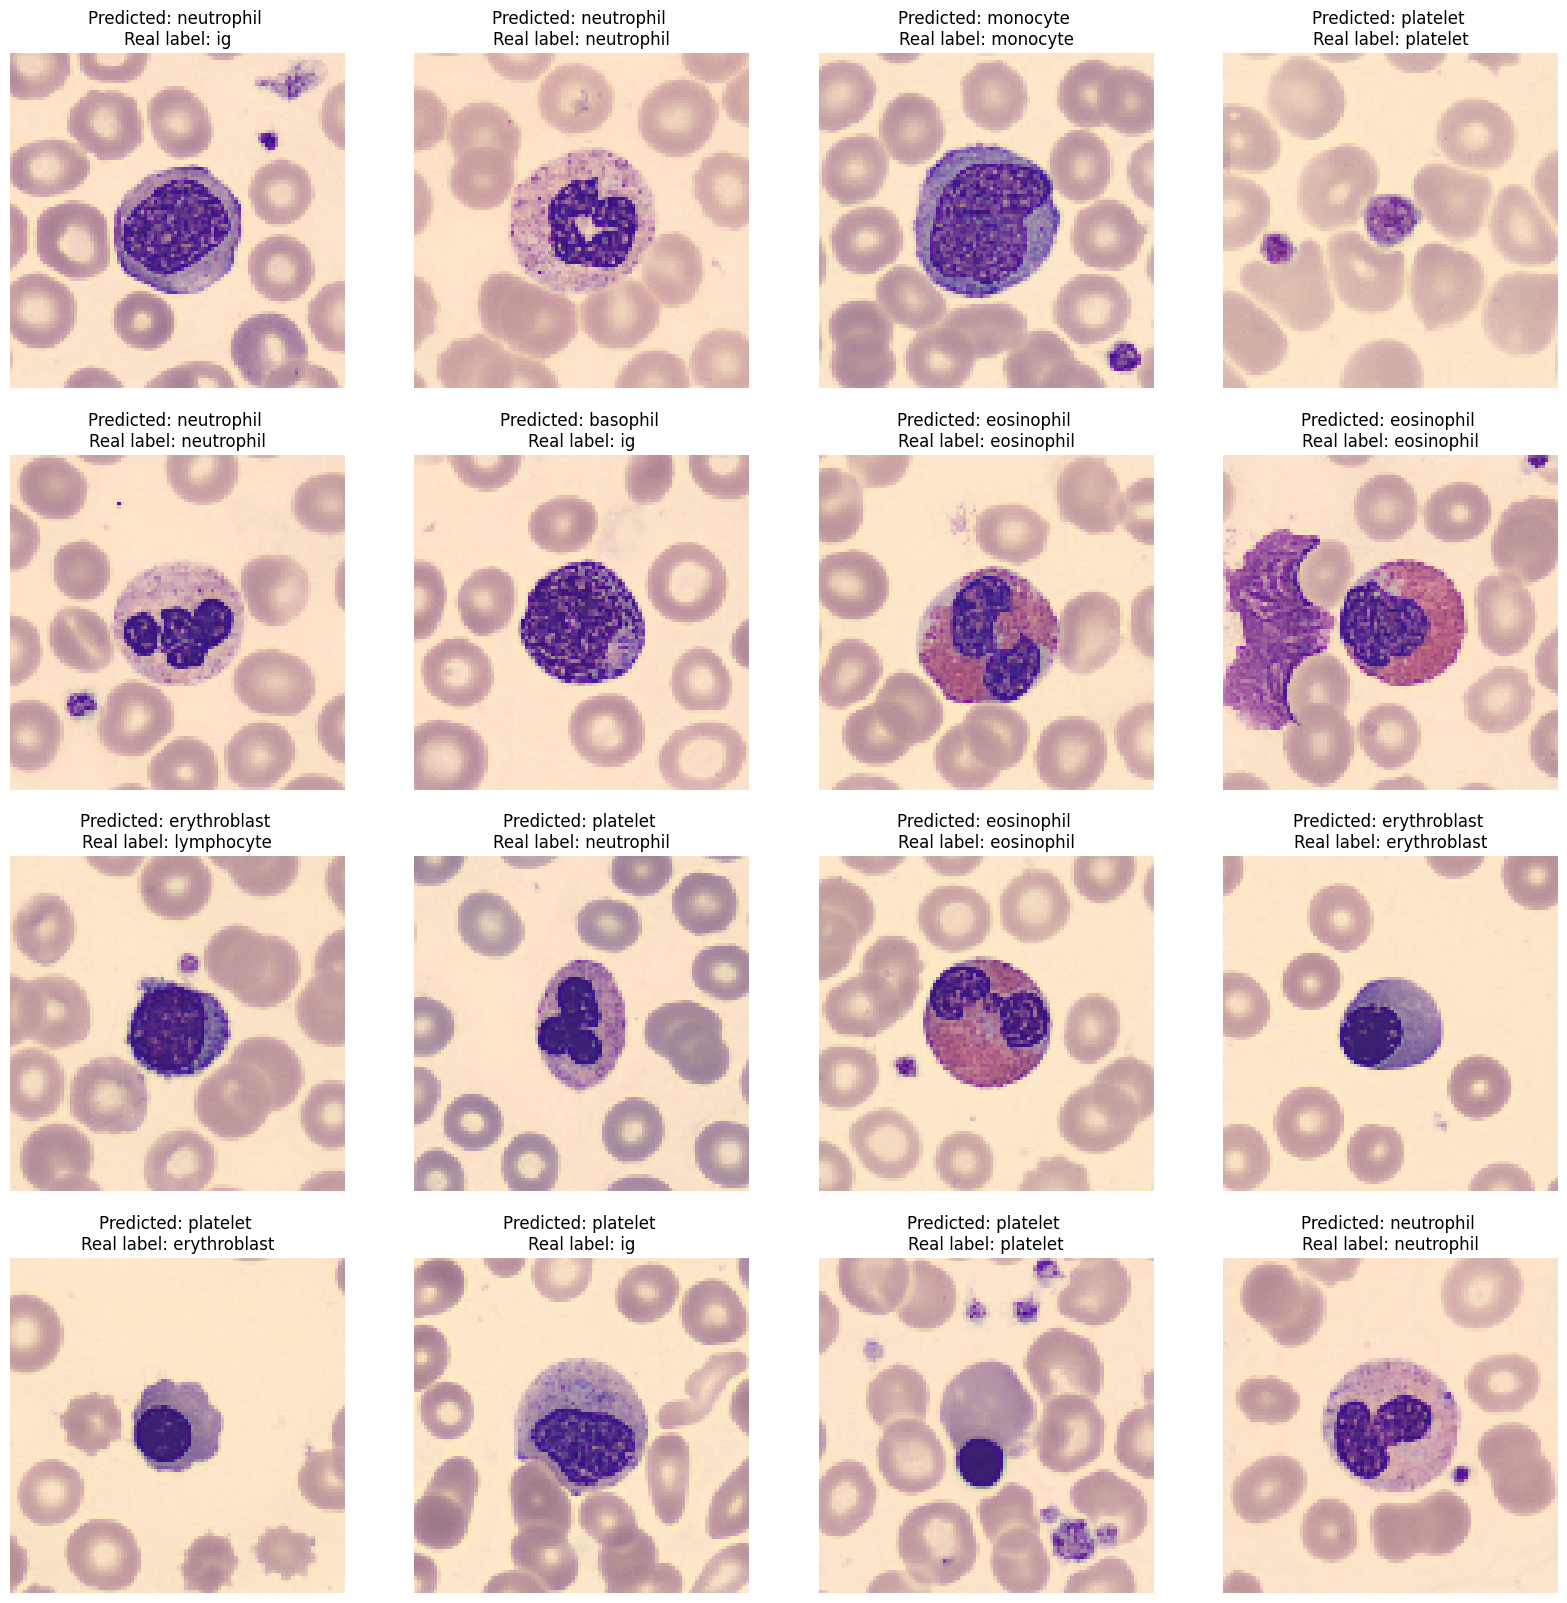

In [57]:
plt.figure(figsize=(20, 20))

# Generate predictions
predictions = model.predict(eval_images)
predicted_indexes = np.argmax(predictions, axis=1)
        

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)

    # Show image
    plt.imshow(eval_images[i].astype("uint8"))

    # Predicted class
    predicted_class = class_names[predicted_indexes[i]]

    # Real class
    real_class = class_names[eval_labels[i]]

    # Title 
    plt.title(f'Predicted: {predicted_class} \nReal label: {real_class}')

    plt.axis("off")


161/161 [==============================] - 1s 6ms/step


([], [])

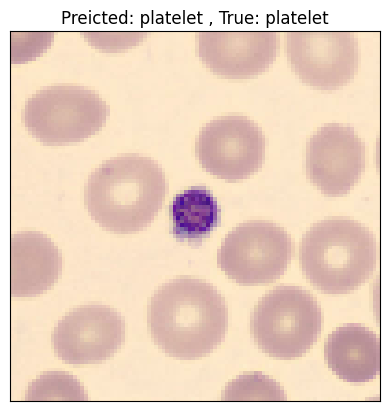

In [59]:
# Generate predictions
predicted_classes = np.argmax(model.predict(img_test), axis=1)
predicted_classes

# Testing an image from the dataset
plt.imshow(img_test[55].reshape(100,100,3))
plt.title("Preicted: {} , True: {}".format(class_names[predicted_classes[55]],class_names[np.argmax(label_test[55])]))
plt.xticks([])
plt.yticks([])

## Confusion Matrix

161/161 [==============================] - 1s 6ms/step


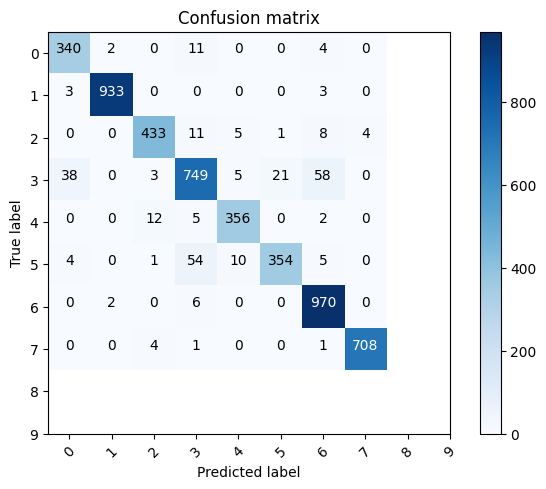

In [61]:
import itertools
from sklearn.metrics import confusion_matrix

# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(img_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(label_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

## Classification Report

## AUC Graph